In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



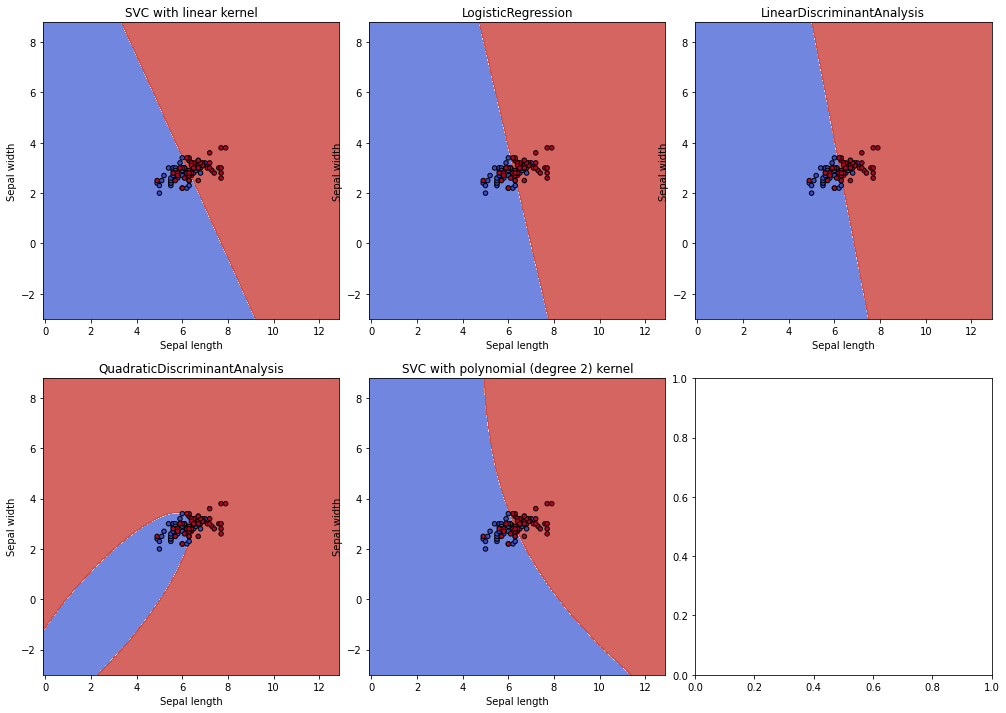

In [2]:
def make_meshgrid(x, y, h=.02):
    d = 5
    x_min, x_max = x.min() - d, x.max() + d
    y_min, y_max = y.min() - d, y.max() + d
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
#X = iris.data[:, :2]
#y = iris.target

X = iris.data[iris.target>=0, :2]
y = iris.target[iris.target>=0]

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = [svm.SVC(kernel='linear', C=C),
          #svm.LinearSVC(C=C, max_iter=10000),
          #GaussianNB(),
          LogisticRegression(random_state=0),
          #svm.SVC(kernel='rbf', gamma=0.7, C=C),
          LinearDiscriminantAnalysis(solver="svd", store_covariance=True),
          QuadraticDiscriminantAnalysis(store_covariance=True),
          svm.SVC(kernel='poly', degree=2, gamma='auto', C=C),
          #GaussianNB()
         ]
models = [clf.fit(X, y) for clf in models]

# title for the plots
titles = ['SVC with linear kernel',
          #'LinearSVC (linear kernel)',
          #'naive Gauss',
          'LogisticRegression',
          #'SVC with RBF kernel',
          'LinearDiscriminantAnalysis',
          'QuadraticDiscriminantAnalysis',
          'SVC with polynomial (degree 2) kernel',
          #'naive Gauss'
         ]

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 3,figsize=(17,12))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    #ax.set_xticks(())
    #ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [6]:
np.arange(3)

array([0, 1, 2])